# Linear to Logistic regression

## Introduction

In this lesson, you'll be introduced to the logistic regression model. You'll start with an introductory example using linear regression, which you've seen before, to act as a segue into logistic regression. After that, you'll learn about the formal notation of logistic regression models. Then, you'll conclude this lesson by looking at a real-world example.

## Objectives

You will be able to:

* Describe the need for logistic regression
* Interpret the parameters of a logistic regression model

## Recap of the linear regression model

You have previously learned about linear regression models. In these models, you are trying to fit a linear relationship between two variables. An example is given below. In this example, you want to find a relationship between age and monthly income. It is reasonable to assume that, on average, older people have a higher income than younger people who are newer to the job market and have less experience. A potential relationship could look like the plot below. The monthly income is shown in 1000s of USD.

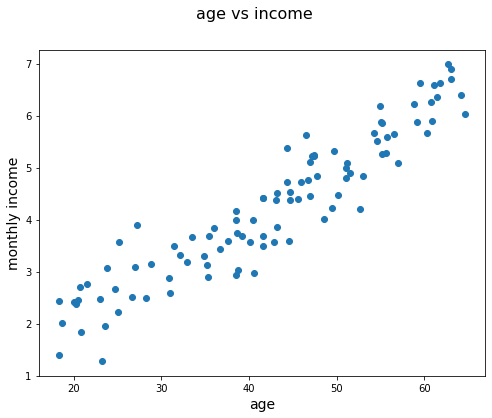

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)
age = age.reshape(-1,1)

fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

In linear regression, you would try to find a relationship between age and monthly income. Conceptually, this means fitting a line that represents the relationship between age and monthly income, as shown below.

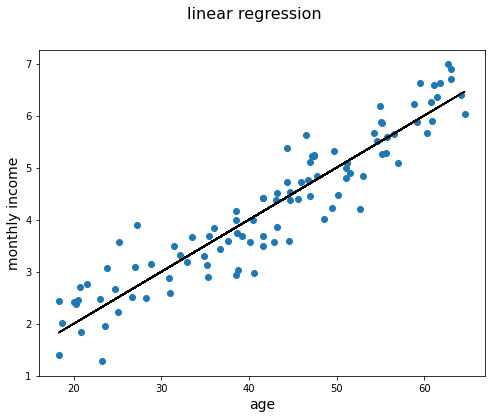

In [2]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c='black')
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

The idea is that you could use this line to make predictions in the future. In this case, the relationship is modeled as follows: the expected monthly income for someone who is, say, 40 years old, is 3000 (3 on the y-axis). Of course, the actual income will most likely be different, but this indicates what the model predicts as the salary value.

## So how is this related to logistic regression?

Now, imagine you get a dataset where no information on exact income is given (after all, people don't like to talk about how much they earn!), but you only have information on whether or not they earn more than 4000 USD per month. Starting from the generated data we used before, the new variable `income_bin` was transformed to 1 when someone's income is over 4000 USD, and 0 when the income is less than 4000 USD.

In [3]:
income_bin = income > 4
income_bin = income_bin.astype(int)  
print(income_bin)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1]


Have a look at what happens when you plot this.

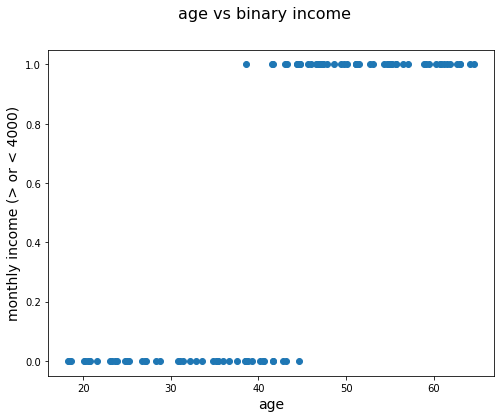

In [4]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income (> or < 4000)', fontsize=14)
plt.show()

You can already tell that fitting a straight line will not work here. Take a look at what happens when you fit a regression line to these data. 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Create linear regression model
lin_reg = LinearRegression()
lin_reg.fit(age, income_bin)
# Store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# Create the line
lin_income = (interc + age * coef)

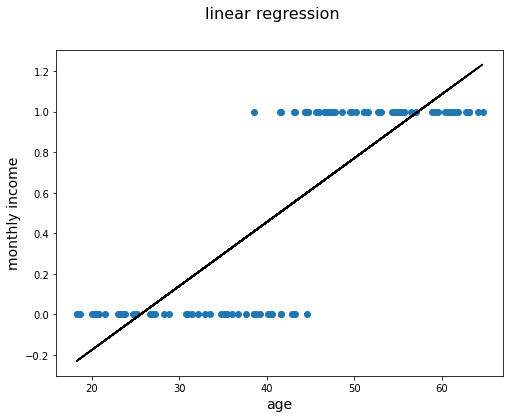

In [6]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(age, lin_income, c='black')
plt.show()

You can see that this doesn't make a lot of sense. This straight line cannot grasp the true structure of what is going on when using a linear regression model. Now, without going into the mathematical details for now, look at a logistic regression model and fit that to the dataset.

In [7]:
# Instantiate a Logistic regression model
# Solver must be specified to avoid warning, see documentation for more information
# liblinear is recommended for small datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
regr = LogisticRegression(C=1e5, solver='liblinear')

# Fit the model to the training set
regr.fit(age, income_bin)

LogisticRegression(C=100000.0, solver='liblinear')

In [8]:
# Store the coefficients
coef = regr.coef_
interc = regr.intercept_

# Create the linear predictor
lin_pred = (age * coef + interc)

# Perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))

# Sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

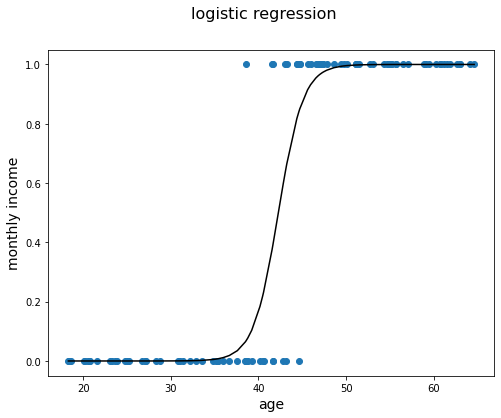

In [9]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c='black')
plt.show()

This already looks a lot better! You can see that this function has an S-shape which plateaus to 0 in the left tale and 1 to the right tale. This is exactly what we needed here. Hopefully this example was a good way of showing why logistic regression is useful. Now, it's time to dive into the mathematics that make logistic regression possible.

## Logistic regression model formulation

### The model

As you might remember from the linear regression lesson, a linear regression model can be written as:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \beta_n x_n $$

When there are $n$ predictors $x_1,\ldots,x_n$ and $n+1$ parameter estimates that are estimated by the model $\hat\beta_0, \hat\beta_1,\ldots, \hat\beta_n$.  $ \hat y $ is an estimator for the outcome variable.

Translating this model formulation to our example, this boils down to:

$$ \text{income} = \beta_0 + \beta_1 \text{age} $$

When you want to apply this to a binary dataset, what you actually want to do is perform a **classification** of your data in one group versus another one. In our case, we want to classify our observations (the 100 people in our dataset) as good as possible in "earns more than 4k" and "earns less than 4k". A model will have to guess what the **probability** is of belonging to one group versus another. And that is exactly what logistic regression models can do! 

Essentially, what happens is, the linear regression is *transformed* in a way that the outcome takes a value between 0 and 1. This can then be interpreted as a probability (e.g., 0.2 is a probability of 20%). Applied to our example, the expression for a logistic regression model would look like this:

$$ P(\text{income} > 4000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{age})}}$$

Note that the outcome is written as $P(\text{income} > 4000)$. This means that the output should be interpreted as *the probability that the monthly income is over 4000 USD*.

It is important to note that this is the case because the income variable was relabeled to be equal to 1 when the income is bigger than 4000, and 0 when smaller than 4000. In other words, the outcome variable should be interpreted as *the probability of the class label to be equal to 1*.

### Interpretation

As mentioned before, the probability of an income over 4000 can be calculated using:

$$ P(\text{income} > 4000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 \text{age})}}$$

You can show that, by multiplying both numerator and denominator by $e^{(\hat \beta_0+\hat \beta_1 \text{age})}$


$$ P(\text{income} > 4000) = \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{age}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{age}}}$$

As a result, you can compute $P(\text{income} \leq 4000)$ as:

$$ P(\text{income} < 4000) = 1- \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{age}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{age}}}= \displaystyle \frac{1}{1+e^{\hat \beta_0+\hat \beta_1 \text{age}}}$$



This doesn't seem to be very spectacular, but combining these two results leads to an easy interpretation of the model parameters, triggered by the *odds*

$$ \dfrac{P(\text{income} > 4000)}{P(\text{income} < 4000)} = e^{\hat \beta_0+\hat \beta_1 \text{age}} $$

This expression can be interpreted as the *odds in favor of an income greater than 4000 USD*.

This result, in combination with mathematical properties of exponential functions, leads to the fact that, applied to our example:

if *age* goes up by 1, the odds are multiplied by $e^{\beta_1}$

In our example, there is a positive relationship between age and income, this will lead a positive $\beta_1 > 0$, so $e^{\beta_1}>1$, and the odds will increase as *age* increases.



# A real-world example

Now you will apply these concepts to a real-world dataset: 

In [10]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [11]:
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


For this example, you will fit a logistic regression model to `Target` using `Age`, `Race`, and `Sex`. Since `Target`, `Race`, and `Sex` are categorical, they need to be be converted to a numeric datatype first. 

The `get_dummies()` function will only convert `object` and `category` datatypes to dummy variables so it is safe to pass `Age` to `get_dummies()`. Note that we also pass two additional arguments, `drop_first=True` and `dtype=float`. The `drop_first=True` argument removes the first level for each categorical variable and the `dtype=float` argument converts the datatype of all the dummy variables to float. The data must be float in order to obtain accurate statistical results from `statsmodels`. 

In [12]:
# Convert race and sex using get_dummies() 
x_feats = ['Race', 'Sex', 'Age']
X = pd.get_dummies(salaries[x_feats], drop_first=True, dtype=float)

# Convert target using get_dummies
y = pd.get_dummies(salaries['Target'], drop_first=True, dtype=float)
y = y['>50K']

In [13]:
import statsmodels.api as sm

# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.498651
         Iterations 6


In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   >50K   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32554
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Nov 2020   Pseudo R-squ.:                 0.09666
Time:                        02:49:23   Log-Likelihood:                -16237.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.4248      0.189    -23.380      0.000      -4.796      -4.054
Age                         0.0387      0.001     38.530      0.000       0.037       0.041
Race_Asian-Pac-Islander     0.9991      0.197      5.079      0.000       0.614       1.385
Race_Black                  0.1812      0.191      0.950      0.342      -0.193       0.555
Race_Other                 -0.1143      0.282     -0.406      0.685      -0.667       0.438
Race_White                  0.8742      0.183      4.782      0.000       0.516       1.232
Sex_Male                    1.2069      0.035     34.380      0.000       1.138       1.276
===========================================================================================
"""

In [15]:
np.exp(result.params)

const                      0.011977
Age                        1.039480
Race_Asian-Pac-Islander    2.715861
Race_Black                 1.198638
Race_Other                 0.891987
Race_White                 2.396965
Sex_Male                   3.343142
dtype: float64

You can also use scikit-learn to retrieve the parameter estimates. The disadvantage here though is that there are no p-values for your parameter estimates!

In [16]:
logreg = LogisticRegression(fit_intercept = False, C = 1e15, solver='liblinear')
model_log = logreg.fit(X, y)
model_log

LogisticRegression(C=1000000000000000.0, fit_intercept=False,
                   solver='liblinear')

In [17]:
model_log.coef_

array([[-4.38706344,  0.03871011,  0.96178903,  0.14397984, -0.14384057,
         0.83689458,  1.2067121 ]])

## Summary 

In this lab you built upon your previous knowledge of linear regression and built an intuitive understanding of how this could be adapted for classification. We then demonstrated tools for performing logistic regression. In the upcoming lessons you will continue to investigate logistic regression from other viewpoints.